In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
df_flights_raw = pd.read_csv(Path("/Users/ershadali/Desktop/DataSets/airlines_flights_data.csv"))

In [4]:
df_flights = df_flights_raw.copy(deep=False)

In [5]:
# remove the index column from dataframe
df_flights.drop(columns="index", inplace=True)

In [6]:
# check if our dataframe has null values
df_flights.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [7]:
df_flights.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [8]:
# the sum of duration, day_left and price for each airline company
df_flights.groupby("airline").sum(numeric_only=True)

,duration,days_left,price
airline,,,
AirAsia,143943.72,446481,65858089
Air_India,1254168.60,2062541,1901529790
GO_FIRST,202888.42,635645,130973972
Indigo,249888.88,1132517,229580207
SpiceJet,113356.28,217371,55681482
Vistara,1703930.16,3310849,3886470735


In [9]:
# get the overall sum of duration, price and rename the index
df_flights.agg(sum_duraion=("duration", "sum"),
               sum_price=("price", "sum"))

,duration,price
sum_duraion,3668176.06,NaN
sum_price,NaN,6.270094e+09


In [10]:
# get the overall average of duration, price and rename the index
df_flights.agg(avg_duration=("duration", "mean"),
               avg_price=("price", "mean"))

,duration,price
avg_duration,12.221021,NaN
avg_price,NaN,20889.660523


In [11]:
# get three most crowdest routes 
df_flights.value_counts(["source_city", "destination_city"]).head(3)

source_city  destination_city
Delhi        Mumbai              15289
Mumbai       Delhi               14809
Delhi        Bangalore           14012
Name: count, dtype: int64

In [12]:
# get the three less crowdest routes
df_flights.value_counts(["source_city", "destination_city"], ascending=True).head(3)

source_city  destination_city
Chennai      Hyderabad           6103
Hyderabad    Chennai             6395
Bangalore    Chennai             6410
Name: count, dtype: int64

In [13]:
# get the fastest flight 
df_flights.sort_values("duration", ascending=True).head(1)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
118982,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,42,1604


In [14]:
# get the longest flight
df_flights.sort_values("duration", ascending=False).head(1)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
194359,Air_India,AI-672,Chennai,Evening,one,Evening,Bangalore,Economy,49.83,9,17538


In [15]:
# get the cheapest flights of each company
df_flights.groupby("airline").min()

,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
airline,,,,,,,,,,
AirAsia,I5-1228,Bangalore,Afternoon,one,Afternoon,Bangalore,Economy,0.92,1,1105
Air_India,AI-401,Bangalore,Afternoon,one,Afternoon,Bangalore,Business,1.00,1,1526
GO_FIRST,G8-101,Bangalore,Afternoon,one,Afternoon,Bangalore,Economy,1.00,1,1105
Indigo,0.00E+00,Bangalore,Afternoon,one,Afternoon,Bangalore,Economy,0.83,1,1105
SpiceJet,SG-1031,Bangalore,Afternoon,one,Afternoon,Bangalore,Economy,1.00,1,1106
Vistara,UK-613,Bangalore,Afternoon,one,Afternoon,Bangalore,Business,1.00,1,1714


In [16]:
# get the most expensive flights of each company
df_flights.groupby("airline").max()

,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
airline,,,,,,,,,,
AirAsia,I5-996,Mumbai,Night,zero,Night,Mumbai,Economy,19.58,49,31917
Air_India,AI-9991,Mumbai,Night,zero,Night,Mumbai,Economy,49.83,49,90970
GO_FIRST,G8-962,Mumbai,Night,zero,Night,Mumbai,Economy,22.50,49,32803
Indigo,6E-998,Mumbai,Night,zero,Night,Mumbai,Economy,15.42,49,31952
SpiceJet,SG-9974,Mumbai,Night,zero,Night,Mumbai,Economy,27.92,49,34158
Vistara,UK-996,Mumbai,Night,zero,Night,Mumbai,Economy,47.08,49,123071


In [34]:
# get the averge price for each airline company and sort them from the most expensive to cheapest
df_flights.groupby("airline").mean("price").sort_values("price", ascending=False)

,duration,days_left,price
airline,,,
Vistara,13.326634,25.894532,30396.536302
Air_India,15.504235,25.497466,23507.019112
SpiceJet,12.579767,24.122850,6179.278881
GO_FIRST,8.755380,27.430415,5652.007595
Indigo,5.795197,26.264309,5324.216303
AirAsia,8.941714,27.735184,4091.072742


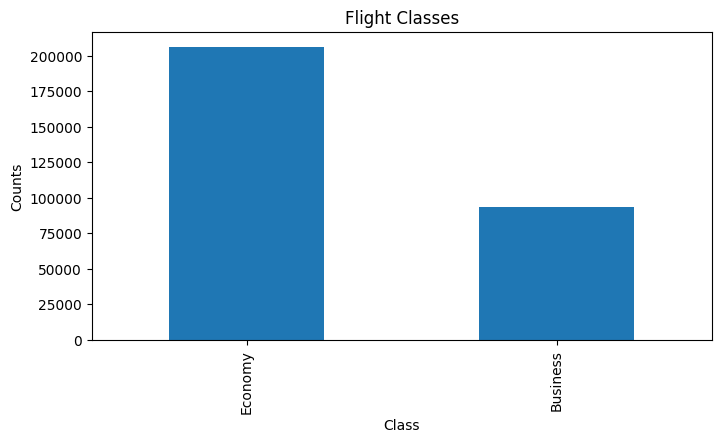

In [18]:
# get how many different classes were used and plot them on barplot
df_flights.value_counts("class").plot(kind="bar", xlabel="Class", 
                                      ylabel="Counts", title="Flight Classes",
                                      figsize=(8,4))
plt.show()

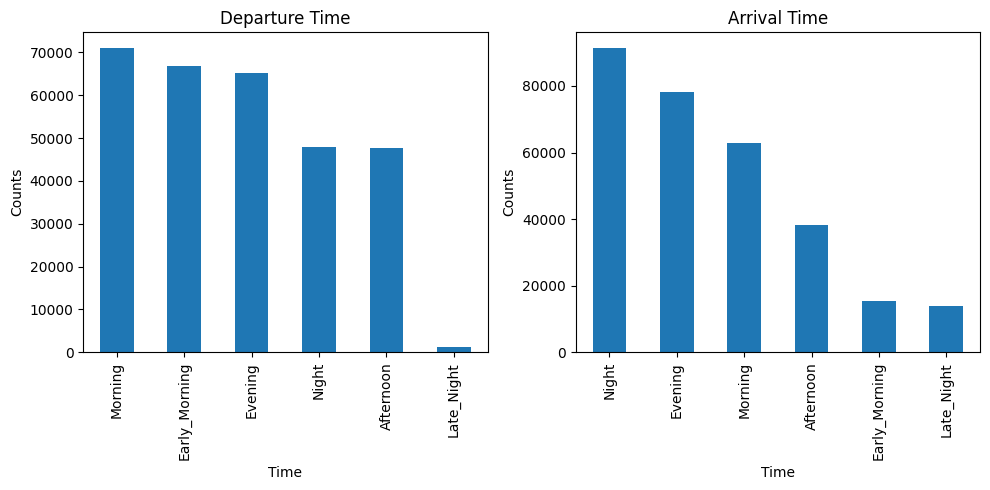

In [21]:
# plot the departure and arrival times on barplot
plt.figure(figsize=(10,5), tight_layout=True)
plt.subplot(1,2,1)
df_flights.value_counts("departure_time").plot(kind="bar", xlabel="Time",
                                               ylabel="Counts", title="Departure Time")
plt.subplot(1,2,2)
df_flights.value_counts("arrival_time").plot(kind="bar", xlabel="Time", 
                                             ylabel="Counts", title="Arrival Time")
plt.show()

In [61]:
# get the average price of Vistara airline for a flight from Delhi to Hyderabad in Business Class
filter1 = df_flights["airline"].isin(["Vistara"])
filter2 = df_flights["source_city"].isin(["Delhi"]) & df_flights["destination_city"].isin(["Hyderabad"])
filter3 = df_flights["class"].isin(["Business"])
df_flights[filter1 & filter2 & filter3]["price"].mean()

np.float64(47939.840361445786)